# Week 2 Tasks Sub-list 2
Student Name: Zhangli Wang  

In [1]:
# packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [2]:
# Read dataset
df = pd.read_csv('./Datasets/rawpvr_2018-02-01_28d_1083 TueFri.csv')

Explaination:\
Read the original csv file 'rawpvr_2018-02-01_28d_1083 TueFri.csv' into a dataframe.

In [3]:
## update the columns 'Flags' and 'Flag Text'

# slice to acquire the 'Date' column
date = df.loc[:, 'Date']

# type conversion: string > timestamp
date = pd.to_datetime(date)

# calculate days of the week
days_of_week = [item.dayofweek for item in date]
# type conversion: list > series
days_of_week = pd.Series(np.array(days_of_week).T)

# update the column 'Flags' in the original dataframe
df.loc[:, 'Flags'] = days_of_week.map(lambda x: x+1, na_action='ignore')

# update the column 'Flag Text' in the original dataframe
df.loc[:, 'Flag Text'] = days_of_week.map(lambda x: 'Tuesday' if x == 1 else ('Friday' if x == 4 else ''), na_action='ignore')

*Explanation*:\
Perform executions to the dataset similar to those I did in the Task1A, which is updating columns `Flag` and `Flag Text` with the day of week information, as we need to filter out all Tuesdays of the week. Besides, this data preparation is also necessary for solving future tasks.

## Task2
**Task**:\
Provide a simple profile of the hourly traffic volume of the North lanes (considering 
all the North lanes together) of site 1083 using the following descriptive data 
summarization measures and focusing only on Tuesdays between 09:00 am and 
10:00 am [exclusive]: Range, 1st Quartile, 2nd Quartile, 3rd Quartile, Interquartile 
range. 

In [4]:
# filter all instances with Tuesday and the north direction
df2 = df.loc[(df['Flags'] == 2) & (df['Direction Name'] == 'North')]

# transform the type of data in the 'Date' column of the dataset: string > timestamp > datetime.time
df2 = df2.assign(Time = pd.to_datetime(df2['Date']).dt.time)
df2 = df2.assign(DateWOTime = pd.to_datetime(df2['Date']).dt.date)

# filter all instances with the time being between 09:00 and 10:00 [exclusive]
start_time = datetime.time(9, 0, 0)
end_time = datetime.time(10, 0, 0)
df2 = df2.loc[(df2['Time'] >= start_time) & (df2['Time'] < end_time)]

*Explanation*:
In this code block, the main objective is to filter the dataset according to the restrictions required and add new columns about time for time comparision in the following. For filtering, the codes
```python
# filter all instances with Tuesday and the north direction
df2 = df.loc[(df['Flags'] == 2) & (df['Direction Name'] == 'North')]
```
and
```python
# filter all instances with the time being between 09:00 and 10:00 [exclusive]
start_time = datetime.time(9, 0, 0)
end_time = datetime.time(10, 0, 0)
df2 = df2.loc[(df2['Time'] >= start_time) & (df2['Time'] < end_time)]
```
help to filter the dataset with specified day of the week, direction of lane, and time period. Two new columns added are "Time" and "DateWOTime", which store the values of the time in a day and the date (without the time in a day), respectively. They are used for time comparision.

In [5]:
# initialize total traffic volumn with regard to dates
traffic_volumns = np.array([])

# calculate the traffic volumn with regard to dates
unique_dates = (df2['DateWOTime']).unique()
unique_lanes = df2['Lane'].unique()

for unique_date in unique_dates:
    # filter with regard to dates and lanes
    filtered_df2 = df2.loc[df2['DateWOTime'] == unique_date]

    # calculate the total traffic volumn on the filtered dataframe
    traffic_volumn = len(filtered_df2.index)

    # record the traffic volumn
    traffic_volumns = np.append(traffic_volumns, traffic_volumn)

# sort the acquired metadata
traffic_volumns.sort()

*Explanation*:
In this code block, the total traffic volumns with regard to different dates are calculated. Firstly, the unique dates are identified with the codes
```python
# calculate the traffic volumn with regard to dates and lanes
unique_dates = df2['DateWOTime'].unique()
```
. Then, they are used for iterately calculate the traffic volumns. In the loop, a filtered dataframe `filtered_df2` is created by filtering the source dataframe with specific date and lane
```python
        # filter with regard to dates and lanes
        filtered_df2 = df2.loc[df2['DateWOTime'] == unique_date]
```
. Then the number of its rows is calculated, which represents the traffic volumn, and recorded in `traffic_volumns`. It will be used for calculating the five metadata.

In [6]:
# calculate range
range_ = max(traffic_volumns) - min(traffic_volumns)
# calculate Q1
Q1 = np.quantile(traffic_volumns, 0.25)
# calculate Q2
Q2 = np.quantile(traffic_volumns, 0.5)
# calculate Q3
Q3 = np.quantile(traffic_volumns, 0.75)
# calculate interquartile range
IQR = Q3 - Q1
print('range: '+ str(range_))
print('Q1: '+ str(Q1))
print('Q2: '+ str(Q2))
print('Q3: '+ str(Q3))
print('IQR: '+ str(IQR))

range: 226.0
Q1: 2397.25
Q2: 2436.5
Q3: 2469.5
IQR: 72.25


*Explanation*:
In this code block the five metadata are calculated by using the functions of numpy.\
The result is:
- Range: 226.0
- 1st Quartile: 2397.25
- 2nd Quartile: 2436.5
- 3rd Quartile: 2469.5
- Interquartile Range: 72.25

### Interpretation of the Results
For analysis of the five metadata, range is a simple representation of the variance in the dataset. In this dataset, the median of traffic volumn is 819.0. And compared to the median, the value of range 226.0 is noticeable in the dataset. It means that the traffic volumn on different dates of the month can possibly vary noticeablely. The interquartile range is a measure of statistical dispersion, the value 72.25 means that this dataset has no significant dispersion. The traffic volumns on different dates of the month are similar to each other.

## Task3
**Task**:\
Choose a day of the week, e.g., Tuesday, and use bar plots to visualise the average traffic volume for each hour of the day. To obtain an accurate average traffic volume for a given week day, for example Tuesday, consider all Tuesday records in the file and consider all lanes associated with the North direction, and later (and separately) considering all lanes associated with the South direction. You should generate a separate bar plot for each traffic direction (North and South).   
- - -

**Solution**:

Day of the week of my choice: **Tuesday**.

In [7]:
# acquire direction names from the dataset
directions = df['Direction Name'].unique()

# filter the dataset with respect that the day of week is Tuesday and the direction is the North/South
df1s = dict()
for direction in directions:
    df1s.update({direction: df.loc[df['Flags'] == 2].loc[df['Direction Name'] == direction]})

# transform the type of data in the 'Date' column of the dataset: string > timestamp > datetime.time
for df1 in df1s.values():
    df1['Time'] = pd.to_datetime(df1['Date']).dt.time

*Explanation*:\
The above executions is a process of data preparation for solving task2. Firstly, the directions of lanes are found in the dataset, which is actually either `North` or `South`. It is consistently reffered in the following parts.

As the initial operation, I filtered the original dataset by selecting only the rows that the day of week is Tuesday (`.loc[df['Flags'] == 2]`). Then, I divided the dataset into two sets stored in `df1s` by the direction of the lane (`.loc[df['Direction Name'] == direction`, which is actually either `North` or `South`.
```python
# filter the dataset with respect that the day of week is Tuesday and the direction is the North/South
df1s = dict()
for direction in directions:
    df1s.update({direction: df.loc[df['Flags'] == 2].loc[df['Direction Name'] == direction]})
```
\
Then I inserted a new column into the intermediate dataframe named `Time` that contains values of time of the day. This process involves data type conversion from `str` to `timestamp` to `datetime.time`, because in the next code block this column will be used for dividing the dataset according to time intervals.
```python
# transform the type of data in the 'Date' column of the dataset: string > timestamp > datetime.time
for df1 in df1s.values():
    df1['Time'] = pd.to_datetime(df1['Date']).dt.time
```

In [8]:
# initialize total traffic volumns per hour for North&South directions
traffic_volumns = dict()
for key in df1s.keys():
    traffic_volumns.update({key: list()})

# seperate the dataset by each hour of the day and calculate the corresponding traffic volumn
start_hours = [datetime.time(i, 0, 0) for i in range(0, 24)]
end_hours = [datetime.time(i, 0, 0) for i in range(1, 24)]
end_hours.append(datetime.time(23, 59, 59))
for key, df1 in df1s.items():
    hourly_tvs = list()  # the traffic volumn of each hour
    for start_hour, end_hour in zip(start_hours, end_hours):
        # filter the dataset with respect that the time is between each one hour interval in a day
        hourly_df1 = df1.loc[(df1['Time'] >= start_hour) & (df1['Time'] < end_hour)]
        
        # calculate the traffic volumn of the time interval
        traffic_volumn = len(hourly_df1.index)
        
        # record the traffic volumn
        traffic_volumns[key].append(traffic_volumn)

*Explanation*:\
In this code block, the overall process is generating the total traffic volumns per hour for both north and south directions. The output is shown below:
```python
{'South': [651, 371, 310, 319, 482, 1159, 3449, 8060, 8540, 6193, 5608, 6174, 6837, 6998, 7968, 9926, 12005, 11176, 9322, 6407, 4321, 3388, 2451, 1323], 
'North': [506, 252, 170, 212, 433, 1446, 5040, 11806, 10908, 9721, 7107, 6537, 6795, 6830, 6568, 7221, 9716, 10623, 8486, 5233, 3531, 2595, 1815, 1027]}
```
For detailed explanation, the initial step is to initialize the output variable. I created a dictionary for storing the key-value pairs of the direction and the total traffic volumns per hour where the initial values are empty lists for updating later.\
\
Next, I plan to iterate over `df1s` for each time interval such as 00:00-01:00, 01:00-02:00... To accomplish this, a list of starting time `start_hours` and a list of ending time `end_hours` are created and zipped coordinately for deciding the filtering boundaries.To be noticed, the `datetime.time` does not allow to have 24:00 which is conflicting the 00:00, so I altered the final boundary to 23:59.
```python
start_hours = [datetime.time(i, 0, 0) for i in range(0, 24)]
end_hours = [datetime.time(i, 0, 0) for i in range(1, 24)]
end_hours.append(datetime.time(23, 59, 59))
```
\
Now, the iteration can start. For each of the directions, the program performs an iteration of boundary checking about the one-hour time intervals in a day. In each iteration, a temperary dataframe `hourly_df` is created by filtering the dataframe with the boundary checking conditions.
```python
hourly_df1 = df1.loc[(df1['Time'] >= start_hour) & (df1['Time'] < end_hour)]
```
Then I sum the number of rows of `hourly_df` which means the total traffic volumn of the hour and append this sum to the output variable `traffic_volumns`.
```python
# calculate the traffic volumn of the time interval
traffic_volumn = len(hourly_df1.index)

# record the traffic volumn
traffic_volumns[key].append(traffic_volumn)
```
After all these iterations are done, the values inside `traffic_volumns` should be the output of this code block. In the next code block I use this output to draw bar plots.

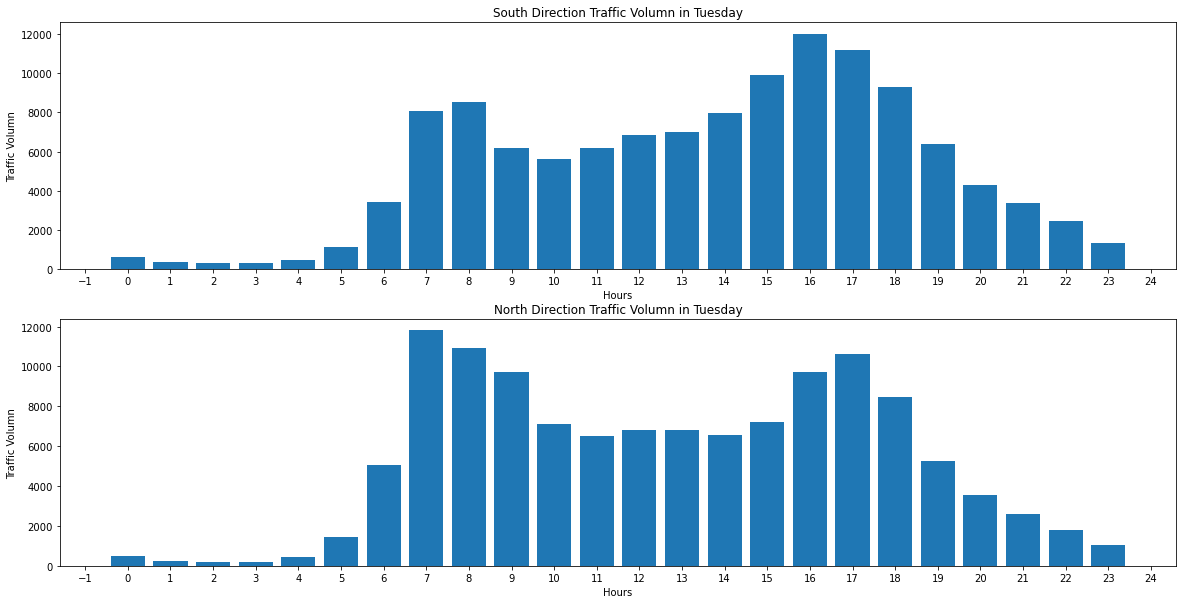

In [9]:
## draw bar plots for the two directions

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))

# initialize values of axes (south)
X = [i for i in range(0, 24)]
Y = traffic_volumns['South']
# load data into axes (south)
ax1.bar(X, Y)
ax1.set_title('South Direction Traffic Volumn in Tuesday')
ax1.set_xlabel("Hours")
ax1.set_ylabel("Traffic Volumn")
ax1.xaxis.set_major_locator(MultipleLocator(1))

# initialize values of axes (north)
X = [i for i in range(0, 24)]
Y = traffic_volumns['North']
# load data into axes (north)
ax2.bar(X, Y)
ax2.set_title('North Direction Traffic Volumn in Tuesday')
ax2.set_xlabel("Hours")
ax2.set_ylabel("Traffic Volumn")
ax2.xaxis.set_major_locator(MultipleLocator(1))

# draw figure
plt.show()

*Explanation*:
In this code block two bar plots are drawn as the desired output of this task, which are the bar plot of south direction traffic volumn per hour in Tuesday and the bar plot of north direction traffic volumn per hour in Tuesday. I use `Matplotlib` to draw the chart with two subplots.\
\
Firstly, I specified the content of the axes. Content of the x axis is labels of hour of the day, content of the y axis is the traffic volumn of the hour (`traffic_volumns['South']` or `traffic_volumns['North']`. Then attributes of the subplots are specified. Finally the figure is drawn.
```python
# initialize values of axes (south)
X = [i for i in range(0, 24)]
Y = traffic_volumns['South']
# load data into axes (south)
ax1.bar(X, Y)
ax1.set_title('South Direction Traffic Volumn in a Day')
ax1.set_xlabel("Hours")
ax1.set_ylabel("Traffic Volumn")
ax1.xaxis.set_major_locator(MultipleLocator(1))

# initialize values of axes (north)
X = [i for i in range(0, 24)]
Y = traffic_volumns['North']
# load data into axes (north)
ax2.bar(X, Y)
ax2.set_title('North Direction Traffic Volumn in a Day')
ax2.set_xlabel("Hours")
ax2.set_ylabel("Traffic Volumn")
ax2.xaxis.set_major_locator(MultipleLocator(1))
```
\
*Interpretation of the result:*
The final output is bar charts visualizing the data of traffic volumns of each one-hour time interval in the Tuesday, regarding to the lanes with north direction or lanes with south direction. Information can be extracted from the two charts that the data demonstrate the variations of traffic volumn with respect to different time periods in Tuesday for specific lanes. This can indicate what time in Tuesday is rush hours and in what time commuting is low.\
\
From the charts, we can extract the information that for both north lanes and south lanes, the rush hours are the time in the morning and the afternoon. It is reasonable because people usually drive between home and their companies in the edges of their working hours. In the daytime the traffic volumns are usually high for at least 6000 vehicles/hour as people do daily activities in the daytime. In the night time the traffic volumns are very low because people usually stay indoors at night. By comparing the two charts, we can tell the difference that the morning commuting in south lanes is lower than north lanes and the afternoon commuting is higher. I guess this is because that in the south it tends to have more residences and in the north it tends to have more workplaces.

## Task4
**Task**:
Develop the same solution for Task 3 described above using a second technology of your choice (a tool or PL), which must be different to the technology you used to develop Task 3 for the first time. You can copy and paste here and/or make simple adaptations to the comments and step-by-step description of the solution you provided for Task 3.
- - -

**Solution**:

I use **Microsoft Excel** as the tool for completing this task. Day of the week of my choice: **Tuesday**.

1. 
Open the original dataset in Excel.
![img](./images/./img1.jpg)

2. 
For the entire column of "Flag Text", apply the function
```excel
=IF(ISBLANK(A2), "", TEXT(A2, "dddd"))
```
, which calculates days of the week regarding the "Date" column.
![img2](img2.jpg)

3. 
Then we need to sort all rows according to time of the day. Firstly we need to add a new column "Time" that stores the corresponding time in the "Date" column, apply this function 
```excel
=IF(ISBLANK(A2), "", TIME(HOUR(A2), MINUTE(A2), SECOND(A2)))
```
to the column to extract hour, minute, and second from the corresponding date. Then, update the type of the column from default "General" to "Time". Finally, we sort the table according to this column by "Sort smallest to largest".
![img](./images/img3.jpg)

4. 
Select the entire table, press <kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>L</kbd> to initialize the filters. Then we can apply filtering to the table.
![img](./images/img4.jpg)

5. 
To tag the time slots, we create a new column named "Time Period" for storing the time period in the format of "%startHour%-%endHour%". Firstly, we should get the starting hour. This is achieved by inserting a new column "Start Hour" and applying the function
```excel
=IF(ISBLANK(A2), "", HOUR(A2))
```
to the entire column.
![img](./images/img5.jpg)
Then in the "Time Period" column, we apply this function
```excel
=IF(ISBLANK(A2), "", CONCATENATE(TEXT(L2,"0"), "-", TEXT(L2+1, "0")))
```
![img](./images/img6.jpg)
to get the textual time periods of the day.

6. 
Then, we need to filter all the instances of Tuesday, and the north direction for drawing the bar chart correctly.
![img](./images/img7.jpg)
![img](./images/img8.jpg)
Then apply the filtering operations.

7. 
Notice that in this code block I created a new sheet named "Count Traffic Volumn" for storing the results of the functions in this code block.
Name of columns:
- "A": "Time Period",
- "B": "Traffic Volumn Count",
- "C": "Traffic Volumn Count (Only Visible Rows)",
- "D": "Traffic Volumn Count - South",
- "E": "Traffic Volumn Count - North".\
Now we can count the number of instances in "Time Period" to extract the information about hourly traffic volumn with specified constraints. To draw the bar chart, we should prepare the axes. For the x-axis, in the column "A" of the created sheet, apply this function
```excel
=UNIQUE(task4!M:M)
```
![img](./images/img9.jpg)
to extract all unique labels.
Then we want to count hourly traffic volumn in the column "B" using this function
```excel
=COUNTIF(task4!M:M, A2)
```
, but in practice, this function does not return the expected result. This is because when we have applied filtering and hiden rows that are filtered, the function still select all the rows as its input regardless of filtering.
So I have to alter to this function
```excel
=SUMPRODUCT(SUBTOTAL(3,OFFSET(task4!M:M,ROW(task4!M:M)-MIN(ROW(task4!M:M)),,1))*(task4!M:M='Count Traffic Volumn'!A2))
```
learned from [this discussion board](https://www.mrexcel.com/board/threads/countif-visible-cells-in-filter-mode.56984/) to conditionally filter values only on visible rows. So for applying filtering on north direction, the values are calculated and copied to the column "D" by plain text.
![img](./images/img10.jpg)
Then similarly, the filtering is then applied on the south direction and the field is automatically updated for calculating the values for south lanes. Then the values are again copied to the column "E" by plain text.
![img](./images/img11.jpg)

8. 
Now we can use column "D" and column "E" to draw the two bar charts by simply clicking > Inesert > Charts > Clustered Columns. Please check out the images attached for the results.
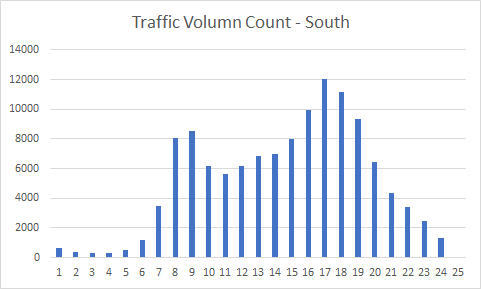
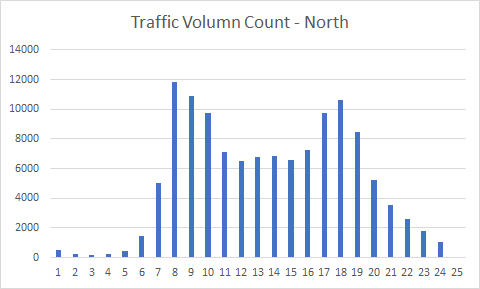

### Comparision of Python and Excel for Solving This Coursework
Both of the two tools have the ability to solve this coursework, but the logics of their operations vary greatly.
For python, one advantage is that the process of manipulation is more interpretable and reviewable for a programmer. And using Jupyter Notebook to program this coursework can help me to divide operations into stages and add explanation everywhere I want. But the disadvantage is that bugs can possibly occur everywhere in my codes.

For Excel, the advantage is that the interface is intuitive and can display the data in a proper tabular structure and the drawing of charts is also very convenient. And for manipulating an entire column, Excel can help me with it with its tools conveniently rather than coding for loops manually. But the disadvantages are also significant. Because most of my manipulations are functions, their dependencies result in everytime I change a part of the Excel file, all the functions are re-calculated, which is time consuming. The other disadvantage is that its filters cannot function well with functions so that I meet the "visible-rows problem" mentioned before that costs me a lot of time to solve it.

Overall, I like coding with python using jupyter notebook better, because I like to read written codes and write new codes alternately.